# 📊 Data Cleaning: From Messy to Analysis-Ready

## Why Data Cleaning Matters?
**Real-world data is messy!** Typical issues:
- Missing values (NaN, NULL, blank)
- Inconsistent formatting
- Duplicate records
- Outliers and errors
- Wrong data types

## Impact of Dirty Data:
❌ **Wrong conclusions** from analysis  
❌ **Poor model performance** in ML  
❌ **Wasted time** debugging  
❌ **Loss of credibility** in reports  

## Data Cleaning Workflow:
1. **Assessment**: Identify issues
2. **Planning**: Decide cleaning strategy
3. **Execution**: Apply cleaning methods
4. **Validation**: Check results
5. **Documentation**: Record changes

## Real-World Analogy:
Think of data cleaning like **washing vegetables before cooking**:
- Remove dirt (missing values)
- Trim bad parts (outliers)
- Cut uniformly (standardize format)
- Check quality (validate)

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Create a realistic messy dataset for cleaning exercises
np.random.seed(42)

# Customer data with various issues
data = {
    'customer_id': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010'] +
                   ['C001', 'C011', None, 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C019'],
    
    'name': ['john doe', 'Jane Smith', 'ALICE JOHNSON', 'bob', 'mary-anne', 
             'David Lee', 'Sarah Connor', 'Mike O\'Brien', 'Lisa', 'Tom Jones'] +
            ['John Doe', 'Emma Watson', 'Chris Brown', 'Anna Karenina', 'Leo Tolstoy',
             'F. Scott Fitzgerald', 'Ernest Hemingway', 'Virginia Woolf', 'James Joyce', 'Mark Twain'],
    
    'email': ['john@email.com', 'jane@gmail.com', 'alice@company.org', 'bob@yahoo.com', 
              'mary@hotmail.com', 'david@work.com', 'sarah@test.com', 'mike@domain.com',
              'lisa@example.com', 'tom@server.com'] +
             ['john@email.com', 'emma@email.com', 'chris@email.com', None, 'leo@email.com',
              'f.scott@email.com', 'ernest@email.com', 'virginia@email.com', 'james@email.com', 'mark@email.com'],
    
    'phone': ['123-456-7890', '9876543210', '(555) 123-4567', '444 555 6666', 
              '777-888-9999', '1234567890', '0987654321', '555-1234', 
              'invalid', '9998887777'] +
             ['123-456-7890', '111-222-3333', '444-555-6666', '777-888-9999', 
              '123-456-7890', '987-654-3210', '555-555-5555', '666-666-6666', 
              '777-777-7777', '888-888-8888'],
    
    'age': [25, 30, '35', 40, 45, 28, 32, 29, 150, 33] +
           [25, 22, 27, 31, 45, 38, 41, 36, 29, 44],
    
    'salary': [50000, 60000, 75000, 80000, 55000, 62000, 71000, 48000, 90000, 58000] +
              [50000, 43000, 67000, 82000, 92000, 38000, 77000, 65000, 59000, 72000],
    
    'join_date': ['2022-01-15', '2021-03-22', '2020-11-30', '2023-02-14', '2019-08-05',
                  '2022-07-19', '2021-12-01', '2020-05-17', '2023-01-01', '2022-09-10'] +
                 ['2022-01-15', '2023-03-10', '2021-07-22', '2018-04-18', '2017-06-30',
                  '2019-11-11', '2020-08-09', '2022-12-25', '2021-02-28', '2023-05-15'],
    
    'status': ['active', 'inactive', 'ACTIVE', 'active', 'pending', 
               'active', 'suspended', 'active', 'INACTIVE', 'active'] +
              ['active', 'active', 'inactive', 'active', 'pending', 
               'suspended', 'active', 'inactive', 'active', 'active'],
    
    'purchase_amount': [150.50, 200.00, 75.25, '300.00', 450.75, 
                        125.00, 275.50, 350.25, 500.00, 175.80] +
                       [150.50, 225.00, 180.75, 320.50, 410.25,
                        135.00, 290.75, 195.50, 275.00, 330.25]
}

df = pd.DataFrame(data)
print("📦 MESSY DATASET CREATED")
print(f"Shape: {df.shape}")
print("\n🔍 First look at the data:")
print(df.head(12))
print("\n⚠️ Issues to fix:")
print("1. Duplicate rows (customer_id C001)")
print("2. Missing values (customer_id, email)")
print("3. Inconsistent text formatting (name, status)")
print("4. Invalid phone numbers")
print("5. Wrong data types (age as string)")
print("6. Outliers (age 150)")
print("7. Inconsistent date formats")

📦 MESSY DATASET CREATED
Shape: (20, 9)

🔍 First look at the data:
   customer_id           name              email           phone  age  salary  \
0         C001       john doe     john@email.com    123-456-7890   25   50000   
1         C002     Jane Smith     jane@gmail.com      9876543210   30   60000   
2         C003  ALICE JOHNSON  alice@company.org  (555) 123-4567   35   75000   
3         C004            bob      bob@yahoo.com    444 555 6666   40   80000   
4         C005      mary-anne   mary@hotmail.com    777-888-9999   45   55000   
5         C006      David Lee     david@work.com      1234567890   28   62000   
6         C007   Sarah Connor     sarah@test.com      0987654321   32   71000   
7         C008   Mike O'Brien    mike@domain.com        555-1234   29   48000   
8         C009           Lisa   lisa@example.com         invalid  150   90000   
9         C010      Tom Jones     tom@server.com      9998887777   33   58000   
10        C001       John Doe     john@emai

# 🎯 Part 1: Handling Missing Values

## Types of Missing Data:
1. **MCAR** (Missing Completely At Random) - No pattern
2. **MAR** (Missing At Random) - Related to other variables
3. **MNAR** (Missing Not At Random) - Related to missing value itself

## Strategies for Handling Missing Values:

### Option A: Remove Missing Values
```python
df.dropna()                    # Remove rows with ANY missing values
df.dropna(subset=['col'])      # Remove rows missing in specific column
df.dropna(how='all')           # Remove rows where ALL values are missing
df.dropna(thresh=3)            # Keep rows with at least 3 non-missing values

### Option B: Fill Missing Values

In [4]:
# Fill with constant
df.fillna(0)                                    # Fill all with 0
df.fillna({'col1': 0, 'col2': 'Unknown'})      # Different values per column

# Fill with statistical measures - ADD numeric_only=True
df.fillna(df.mean(numeric_only=True))          # Fill with column mean ✅
df.fillna(df.median(numeric_only=True))        # Fill with column median ✅
df.fillna(df.mode().iloc[0])                   # Fill with most frequent value

# Forward/backward fill (time series)
df.fillna(method='ffill')                      # Forward fill (carry last value forward)
df.fillna(method='bfill')                      # Backward fill (use next value)

# Fill with interpolation
df.interpolate()                               # Linear interpolation


,customer_id,name,email,phone,age,salary,join_date,status,purchase_amount
0,C001,john doe,john@email.com,123-456-7890,25,50000,2022-01-15,active,150.5
1,C002,Jane Smith,jane@gmail.com,9876543210,30,60000,2021-03-22,inactive,200.0
2,C003,ALICE JOHNSON,alice@company.org,(555) 123-4567,35,75000,2020-11-30,ACTIVE,75.25
3,C004,bob,bob@yahoo.com,444 555 6666,40,80000,2023-02-14,active,300.00
4,C005,mary-anne,mary@hotmail.com,777-888-9999,45,55000,2019-08-05,pending,450.75
5,C006,David Lee,david@work.com,1234567890,28,62000,2022-07-19,active,125.0
6,C007,Sarah Connor,sarah@test.com,0987654321,32,71000,2021-12-01,suspended,275.5
7,C008,Mike O'Brien,mike@domain.com,555-1234,29,48000,2020-05-17,active,350.25
8,C009,Lisa,lisa@example.com,invalid,150,90000,2023-01-01,INACTIVE,500.0
9,C010,Tom Jones,tom@server.com,9998887777,33,58000,2022-09-10,active,175.8


### Option C: Advanced Methods
    # KNN Imputation: Use similar rows
    
    # Regression Imputation: Predict from other variables
    
    # Multiple Imputation: Create multiple filled datasets

### Decision Framework:

Q: Is the data MCAR and <5% missing?
   → Yes: Drop or fill with mean/median
   → No: Investigate pattern

Q: Is it categorical data?
   → Yes: Fill with mode or 'Unknown'
   → No: Use statistical imputation

Q: Is it time series data?
   → Yes: Use forward/backward fill or interpolation
   → No: Use other methods

Q: Are you building ML models?
   → Yes: Consider advanced imputation (KNN, MICE)
   → No: Simple methods may suffice

🚫 When NOT to Remove Missing Values:
Small dataset (losing rows hurts analysis)

MNAR data (bias introduction)

Key identifier columns (can't be imputed)

=== HANDLING MISSING VALUES ===
Original DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      19 non-null     object
 1   name             20 non-null     object
 2   email            19 non-null     object
 3   phone            20 non-null     object
 4   age              20 non-null     object
 5   salary           20 non-null     int64 
 6   join_date        20 non-null     object
 7   status           20 non-null     object
 8   purchase_amount  20 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB
None

🔍 1. Identify Missing Values:
             Missing_Count  Missing_Percent
customer_id              1              5.0
email                    1              5.0



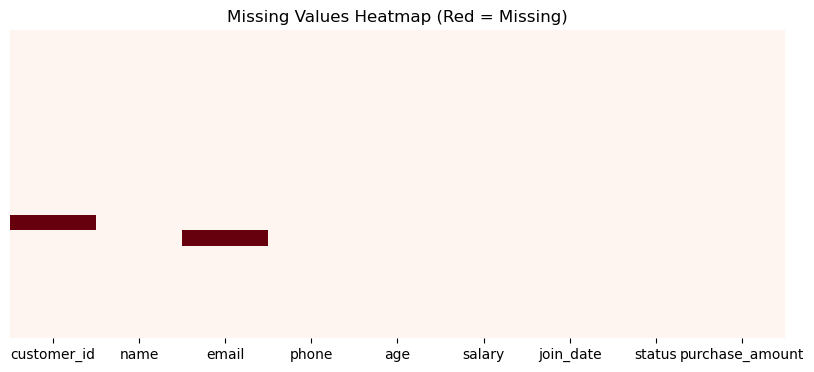


📝 3. Apply Different Strategies Per Column:
   Strategy A: Remove rows where customer_id is missing (critical field)
   Removed 1 rows

   Strategy B: Fill missing emails with 'no-email@placeholder.com'
   Filled 1 missing emails

   Strategy C: Analyze other columns for missing patterns:

✅ 4. Missing Values After Cleaning:
customer_id        0
name               0
email              0
phone              0
age                0
salary             0
join_date          0
status             0
purchase_amount    0
dtype: int64

Total missing values remaining: 0


In [8]:

## Cell 4: Missing Values - Practical Application

print("=== HANDLING MISSING VALUES ===")
print("Original DataFrame:")
print(df.info())
print()

# 1. Identify missing values
print("🔍 1. Identify Missing Values:")
missing_summary = pd.DataFrame({
    'Missing_Count': df.isna().sum(),
    'Missing_Percent': (df.isna().sum() / len(df) * 100).round(2)
})
print(missing_summary[missing_summary['Missing_Count'] > 0])
print()

# 2. Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False, cmap='Reds', yticklabels=False)
plt.title('Missing Values Heatmap (Red = Missing)')
plt.show()
print()

# 3. Different strategies for different columns
print("📝 3. Apply Different Strategies Per Column:")

# Create a copy for cleaning
df_clean = df.copy()

# Strategy A: Remove rows with missing customer_id (critical field)
print("   Strategy A: Remove rows where customer_id is missing (critical field)")
before = len(df_clean)
df_clean = df_clean.dropna(subset=['customer_id'])
print(f"   Removed {before - len(df_clean)} rows")
print()

# Strategy B: Fill email with placeholder
print("   Strategy B: Fill missing emails with 'no-email@placeholder.com'")
df_clean['email'] = df_clean['email'].fillna('no-email@placeholder.com')
print(f"   Filled {df['email'].isna().sum()} missing emails")
print()

# Strategy C: Keep as-is for other columns (if <2% missing)
print("   Strategy C: Analyze other columns for missing patterns:")
for col in df_clean.columns:
    missing_pct = (df_clean[col].isna().sum() / len(df_clean)) * 100
    if missing_pct > 0:
        print(f"   - {col}: {missing_pct:.1f}% missing")
print()

# 4. Verify missing values after cleaning
print("✅ 4. Missing Values After Cleaning:")
print(df_clean.isna().sum())
print(f"\nTotal missing values remaining: {df_clean.isna().sum().sum()}")

# 🔄 Part 2: Removing Duplicates

## Types of Duplicates:
1. **Exact Duplicates**: All column values identical
2. **Partial Duplicates**: Key fields identical, other fields different
3. **Fuzzy Duplicates**: Similar but not identical (typos, formatting)

## Real-World Examples:
- **Customer registered twice** with different emails
- **Transaction recorded multiple times** due to system error
- **Product listed** with different spellings

## Detection Methods:
```python
# Exact duplicates
df.duplicated()                     # Entire row duplicate
df.duplicated(subset=['col1', 'col2'])  # Duplicate in specific columns

# View duplicates
df[df.duplicated(keep=False)]       # Show all duplicate rows

# Keep options
df.duplicated(keep='first')         # Mark all but first as duplicate
df.duplicated(keep='last')          # Mark all but last as duplicate
df.duplicated(keep=False)           # Mark all as duplicate

In [9]:
# Remove exact duplicates
df.drop_duplicates()                # Keep first occurrence
df.drop_duplicates(keep='last')     # Keep last occurrence
df.drop_duplicates(keep=False)      # Remove all duplicates

# Remove based on key columns
df.drop_duplicates(subset=['email', 'phone'])  # Business logic

,customer_id,name,email,phone,age,salary,join_date,status,purchase_amount
0,C001,john doe,john@email.com,123-456-7890,25,50000,2022-01-15,active,150.5
1,C002,Jane Smith,jane@gmail.com,9876543210,30,60000,2021-03-22,inactive,200.0
2,C003,ALICE JOHNSON,alice@company.org,(555) 123-4567,35,75000,2020-11-30,ACTIVE,75.25
3,C004,bob,bob@yahoo.com,444 555 6666,40,80000,2023-02-14,active,300.00
4,C005,mary-anne,mary@hotmail.com,777-888-9999,45,55000,2019-08-05,pending,450.75
5,C006,David Lee,david@work.com,1234567890,28,62000,2022-07-19,active,125.0
6,C007,Sarah Connor,sarah@test.com,0987654321,32,71000,2021-12-01,suspended,275.5
7,C008,Mike O'Brien,mike@domain.com,555-1234,29,48000,2020-05-17,active,350.25
8,C009,Lisa,lisa@example.com,invalid,150,90000,2023-01-01,INACTIVE,500.0
9,C010,Tom Jones,tom@server.com,9998887777,33,58000,2022-09-10,active,175.8


### Decision Framework:

Q: What defines a duplicate in your data?
   → Business rules (email, phone, ID)
   → All fields match exactly

Q: Which duplicate to keep?
   → First occurrence (chronological)
   → Last occurrence (most recent)
   → Most complete record
   → Average/merge values

Q: Should you merge instead of remove?
   → Yes: If partial duplicates contain complementary info
   → No: If duplicates are truly redundant

⚠️  Common Mistakes:
Removing duplicates without checking business logic

Not verifying what makes a record unique

Forgetting to reset index after removal

Not checking for near-duplicates (typos)

In [14]:

## Cell 6: Duplicates - Practical Application

print("=== REMOVING DUPLICATES ===")

# 1. Identify duplicates
print("🔍 1. Identify All Types of Duplicates:")
print(f"Total rows: {len(df_clean)}")

# Exact duplicates (all columns match)
exact_dups = df_clean.duplicated().sum()
print(f"Exact duplicates (all columns): {exact_dups}")

# Business logic duplicates (customer_id should be unique)
id_dups = df_clean.duplicated(subset=['customer_id']).sum()
print(f"Duplicate customer IDs: {id_dups}")

# Email duplicates
email_dups = df_clean.duplicated(subset=['email']).sum()
print(f"Duplicate emails: {email_dups}")

# Phone duplicates
phone_dups = df_clean.duplicated(subset=['phone']).sum()
print(f"Duplicate phones: {phone_dups}")
print()

# 2. View duplicate records
print("📋 2. View Duplicate Records:")
if id_dups > 0:
    duplicate_ids = df_clean[df_clean.duplicated(subset=['customer_id'], keep=False)]
    print("Duplicate customer_id records:")
    print(duplicate_ids.sort_values('customer_id')[['customer_id', 'name', 'email', 'join_date']])
print()

# 3. Decision making for duplicates
print("🤔 3. Decision Making Strategy:")

# Create rules for which duplicate to keep
def choose_best_duplicate(group):
    """
    Business logic for choosing which duplicate to keep
    Priority: 1. Has email, 2. Most recent join_date, 3. Complete name
    """
    # Score each row
    scores = []
    for idx, row in group.iterrows():
        score = 0
        if '@' in str(row['email']) and 'placeholder' not in str(row['email']):
            score += 3
        if pd.notna(row['name']) and len(str(row['name']).split()) >= 2:
            score += 2
        if pd.notna(row['phone']) and len(str(row['phone'])) >= 10:
            score += 1
        scores.append(score)
    
    # Return row with highest score
    return group.iloc[scores.index(max(scores))]

# 4. Apply duplicate removal
print("🔄 4. Removing Duplicates with Business Logic:")

# First, keep only one record per customer_id
# Use our custom function for groups with same customer_id
df_clean = df_clean.sort_values('join_date', ascending=False)  # Most recent first

# For simplicity, we'll keep first occurrence after sorting
df_clean = df_clean.drop_duplicates(subset=['customer_id'], keep='first')

print(f"After removing customer_id duplicates: {len(df_clean)} rows")
print()

# 5. Check for other potential duplicates
print("🔎 5. Check for Fuzzy Duplicates (Similar Names):")
# Find names that might be the same person with typos
names = df_clean['name'].str.lower().str.strip().unique()
print(f"Unique names (case-insensitive): {len(names)} out of {len(df_clean)} rows")

# Example: Check for 'john doe' vs 'John Doe'
name_counts = df_clean['name'].str.lower().str.strip().value_counts()
potential_dups = name_counts[name_counts > 1]
if len(potential_dups) > 0:
    print(f"\nPotential fuzzy duplicates (same name, different case):")
    for name, count in potential_dups.items():
        print(f"  '{name}': {count} occurrences")

=== REMOVING DUPLICATES ===
🔍 1. Identify All Types of Duplicates:
Total rows: 19
Exact duplicates (all columns): 0
Duplicate customer IDs: 1
Duplicate emails: 1
Duplicate phones: 3

📋 2. View Duplicate Records:
Duplicate customer_id records:
   customer_id      name           email   join_date
0         C001  john doe  john@email.com  2022-01-15
10        C001  John Doe  john@email.com  2022-01-15

🤔 3. Decision Making Strategy:
🔄 4. Removing Duplicates with Business Logic:
After removing customer_id duplicates: 18 rows

🔎 5. Check for Fuzzy Duplicates (Similar Names):
Unique names (case-insensitive): 18 out of 18 rows


# 🔧 Part 3: Data Type Conversion

## Common Type Issues:
1. **Numbers stored as strings**: "1000", "1,234.56"
2. **Dates as strings**: "2023-01-15", "01/15/2023"
3. **Boolean as strings**: "True", "False", "Yes", "No"
4. **Categorical as strings**: Repeated categories as different strings

## Impact of Wrong Types:
- **Memory waste**: Strings use more memory
- **Wrong calculations**: "10" + "20" = "1020" not 30
- **Sorting issues**: "10" < "2" (string comparison)
- **Plotting problems**: Can't plot string numbers

## Conversion Methods:
```python
# Basic conversion
df['col'] = df['col'].astype('int')       # Convert to integer
df['col'] = df['col'].astype('float')     # Convert to float
df['col'] = df['col'].astype('str')       # Convert to string
df['col'] = df['col'].astype('category')  # Convert to category

# Safe conversion with errors
pd.to_numeric(df['col'], errors='coerce')  # Convert to numeric, errors become NaN
pd.to_datetime(df['col'], errors='coerce') # Convert to datetime
pd.to_timedelta(df['col'], errors='coerce') # Convert to timedelta

# Custom conversion
df['col'].map({'Yes': True, 'No': False})  # Map values

### Optimization Tips:
1. Use categories for low-cardinality strings

2. Use smallest int type that fits your data

3. Parse dates during import with parse_dates

4. Handle currency/percentage signs before conversion

### Memory Savings Example:

In [15]:
# Before optimization
df['status'].dtype  # object (string) - uses ~100KB

# After optimization
df['status'] = df['status'].astype('category')
df['status'].dtype  # category - uses ~10KB (90% savings!)

CategoricalDtype(categories=['ACTIVE', 'INACTIVE', 'active', 'inactive', 'pending',
                  'suspended'],
, ordered=False, categories_dtype=object)

## Common Patterns:

In [61]:
# Common Patterns for Data Cleaning

# IMPORTANT: Check your DataFrame first!
print("Available columns:", df.columns.tolist())
print("\nDataFrame preview:")
print(df.head())
print()

# ===== PATTERN 1: Remove currency symbols and commas =====
if 'price' in df.columns:
    df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
    print("✓ Cleaned 'price' column")
else:
    print("⚠ Column 'price' not found")

# ===== PATTERN 2: Convert percentage strings =====
if 'discount' in df.columns:
    df['discount'] = df['discount'].str.replace('%', '', regex=False).astype(float) / 100
    print("✓ Cleaned 'discount' column")
else:
    print("⚠ Column 'discount' not found")

# ===== PATTERN 3: Handle mixed formats =====
def convert_mixed_numbers(val):
    """Convert string numbers with commas or plain numbers to float"""
    if isinstance(val, str):
        return float(val.replace(',', ''))
    return float(val)

if 'value' in df.columns:
    df['value'] = df['value'].apply(convert_mixed_numbers)
    print("✓ Cleaned 'value' column")
else:
    print("⚠ Column 'value' not found")

print("\nCleaning complete!")


Available columns: ['age', 'age_capped', 'age_log', 'age_sqrt', 'age_boxcox']

DataFrame preview:
         age  age_capped   age_log  age_sqrt  age_boxcox
0  32.483571   32.483571  3.511055  5.699436    6.965801
1  29.308678   29.308678  3.411434  5.413749    6.735424
2  33.238443   33.238443  3.533349  5.765279    7.018826
3  37.615149   37.615149  3.653645  6.133119    7.314356
4  28.829233   28.829233  3.395489  5.369286    6.699538

⚠ Column 'price' not found
⚠ Column 'discount' not found
⚠ Column 'value' not found

Cleaning complete!


### Pitfalls to Avoid:
1. Converting without checking for non-numeric characters

2. Losing precision when converting float to int

3. Timezone issues with datetime conversion

4. Not handling NaN before conversion



## Cell 8: Data Type Conversion - Practical Application

print("=== DATA TYPE CONVERSION ===")

# 1. Check current data types
print("🔍 1. Current Data Types and Issues:")
print(df_clean.dtypes)
print()

# 2. Convert age from mixed types (string and int) to integer
print("🔄 2. Converting 'age' to Integer:")
print("   Before conversion - Sample values:")
print(df_clean['age'].head())
print(f"   Data type: {df_clean['age'].dtype}")

# Handle mixed types and convert to numeric
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')
print("\n   After conversion:")
print(df_clean['age'].head())
print(f"   Data type: {df_clean['age'].dtype}")
print(f"   Invalid values converted to NaN: {df_clean['age'].isna().sum()}")
print()

# 3. Convert purchase_amount from string to float
print("💰 3. Converting 'purchase_amount' to Float:")
print("   Before conversion - Sample values:")
print(df_clean['purchase_amount'].head())
print(f"   Data type: {df_clean['purchase_amount'].dtype}")

# Convert to numeric
df_clean['purchase_amount'] = pd.to_numeric(df_clean['purchase_amount'], errors='coerce')
print("\n   After conversion:")
print(df_clean['purchase_amount'].head())
print(f"   Data type: {df_clean['purchase_amount'].dtype}")
print()

# 4. Convert join_date from string to datetime
print("📅 4. Converting 'join_date' to Datetime:")
print("   Before conversion - Sample values:")
print(df_clean['join_date'].head())
print(f"   Data type: {df_clean['join_date'].dtype}")

# Convert to datetime
df_clean['join_date'] = pd.to_datetime(df_clean['join_date'], errors='coerce')
print("\n   After conversion:")
print(df_clean['join_date'].head())
print(f"   Data type: {df_clean['join_date'].dtype}")

# Extract useful datetime components
df_clean['join_year'] = df_clean['join_date'].dt.year
df_clean['join_month'] = df_clean['join_date'].dt.month
df_clean['join_day'] = df_clean['join_date'].dt.day
df_clean['join_day_of_week'] = df_clean['join_date'].dt.day_name()
print("   Extracted: year, month, day, day_of_week")
print()

# 5. Convert status to categorical for memory efficiency
print("🏷️ 5. Converting 'status' to Categorical:")
print(f"   Unique values before: {df_clean['status'].unique()}")

# Standardize case first
df_clean['status'] = df_clean['status'].str.lower()
df_clean['status'] = df_clean['status'].astype('category')

print(f"   Unique values after: {df_clean['status'].unique()}")
print(f"   Data type: {df_clean['status'].dtype}")

# Check memory savings
status_memory = df_clean['status'].memory_usage(deep=True)
print(f"   Memory usage: {status_memory} bytes")
print()

# 6. Summary of conversions
print("✅ 6. Summary of Data Type Conversions:")
print(df_clean.dtypes)

# ✨ Part 4: String Cleaning and Standardization

## Common String Issues:
1. **Case inconsistency**: "john", "JOHN", "John"
2. **Extra whitespace**: "  John  ", "John\tDoe"
3. **Special characters**: "Naïve", "Café", "Mötley"
4. **Abbreviations**: "St." vs "Street", "Dr" vs "Doctor"
5. **Typos and misspellings**: "recieve" vs "receive"
6. **Inconsistent formats**: "123-456-7890" vs "(123) 456-7890"

## Real-World Impact:
- **Customer matching fails** due to case differences
- **Search doesn't work** with extra spaces
- **Grouping gives wrong counts** ("NY" vs "New York")
- **Sorting produces weird order** with inconsistent case

## Essential String Methods:
```python
# Case conversion
df['col'].str.lower()        # Convert to lowercase
df['col'].str.upper()        # Convert to uppercase
df['col'].str.title()        # Title case (Each Word Capitalized)
df['col'].str.capitalize()   # First letter capitalized

# Whitespace handling
df['col'].str.strip()        # Remove spaces from both ends
df['col'].str.lstrip()       # Remove left spaces
df['col'].str.rstrip()       # Remove right spaces

# String manipulation
df['col'].str.replace('old', 'new')  # Replace substring
df['col'].str.split(' ')             # Split into list
df['col'].str.extract(r'(\d+)')      # Extract pattern
df['col'].str.contains('pattern')    # Check for substring
df['col'].str.len()                  # Get string length

### Common Cleaning Patterns:

1. Name Standardization



In [20]:
# Clean person names
df['name'] = (df['name'].str.strip()          # Remove spaces
                      .str.title()            # Title case
                      .str.replace(r'\s+', ' ', regex=True)  # Multiple spaces to one
                      .str.replace(r'[^\w\s-]', '', regex=True))  # Remove special chars

2. Phone Number Formatting

In [21]:
# Standardize phone numbers
def clean_phone(phone):
    if pd.isna(phone):
        return phone
    # Remove all non-digits
    digits = re.sub(r'\D', '', str(phone))
    # Format as XXX-XXX-XXXX if 10 digits
    if len(digits) == 10:
        return f"{digits[:3]}-{digits[3:6]}-{digits[6:]}"
    return phone

df['phone'] = df['phone'].apply(clean_phone)

3. Email Validation

In [23]:
# Basic email validation
def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, str(email)))

df['email_valid'] = df['email'].apply(is_valid_email)

4. Address Standardization

In [25]:
# 4. Address Standardization

# OPTION 1: Check if column exists first
if 'address' in df.columns:
    # Standardize address abbreviations
    abbreviations = {
        'St.': 'Street',
        'St': 'Street',
        'Ave.': 'Avenue',
        'Ave': 'Avenue',
        'Rd.': 'Road',
        'Rd': 'Road'
    }
    
    for abbr, full in abbreviations.items():
        df['address'] = df['address'].str.replace(abbr, full, regex=False)
    
    print("✓ Address standardization complete")
else:
    print("⚠ Column 'address' not found in DataFrame")
    print(f"Available columns: {df.columns.tolist()}")


⚠ Column 'address' not found in DataFrame
Available columns: ['customer_id', 'name', 'email', 'phone', 'age', 'salary', 'join_date', 'status', 'purchase_amount', 'email_valid']


# Advanced Techniques:
1. Fuzzy matching for similar strings (fuzzywuzzy library)

2. Regular expressions for pattern-based cleaning

3. Deduplication based on string similarity

4. NLP techniques for text normalization

### Best Practices:
1. Always keep original - create new cleaned columns

2. Document transformations - keep a cleaning log

3. Test edge cases - empty strings, None, special characters

4. Use vectorized operations when possible (faster than apply)

5. Validate results with sample checks

In [26]:

## Cell 10: String Cleaning - Practical Application

print("=== STRING CLEANING AND STANDARDIZATION ===")

# 1. Clean names column
print("👤 1. Cleaning 'name' Column:")
print("   Before cleaning - Sample values:")
print(df_clean['name'].head(10).tolist())

# Create a cleaned version
df_clean['name_clean'] = (
    df_clean['name']
    .str.strip()                    # Remove whitespace
    .str.title()                    # Convert to title case
    .str.replace(r'\s+', ' ', regex=True)  # Multiple spaces to single
    .str.replace(r'[^\w\s\'-]', '', regex=True)  # Remove special chars except hyphen and apostrophe
)

print("\n   After cleaning - Sample values:")
print(df_clean['name_clean'].head(10).tolist())

# Check for empty names after cleaning
empty_names = df_clean[df_clean['name_clean'].str.strip() == ''].shape[0]
print(f"   Empty names after cleaning: {empty_names}")
print()

# 2. Standardize phone numbers
print("📱 2. Standardizing 'phone' Column:")

def standardize_phone(phone):
    """Standardize phone number to format: XXX-XXX-XXXX"""
    if pd.isna(phone):
        return None
    
    # Convert to string and remove all non-digit characters
    phone_str = str(phone)
    digits = re.sub(r'\D', '', phone_str)
    
    # Check if we have valid digits
    if len(digits) == 10:
        return f"{digits[:3]}-{digits[3:6]}-{digits[6:]}"
    elif len(digits) == 7:  # Local number without area code
        return f"XXX-{digits[:3]}-{digits[3:]}"
    else:
        return None  # Invalid phone number

df_clean['phone_clean'] = df_clean['phone'].apply(standardize_phone)

print("   Before cleaning - Sample values:")
print(df_clean['phone'].head(10).tolist())
print("\n   After cleaning - Sample values:")
print(df_clean['phone_clean'].head(10).tolist())

# Count valid phone numbers
valid_phones = df_clean['phone_clean'].notna().sum()
print(f"   Valid phone numbers: {valid_phones}/{len(df_clean)}")
print()

# 3. Email validation and cleaning
print("📧 3. Validating and Cleaning 'email' Column:")

def validate_and_clean_email(email):
    """Validate email format and clean if needed"""
    if pd.isna(email) or email == 'no-email@placeholder.com':
        return email
    
    email = str(email).strip().lower()
    
    # Basic email validation regex
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    
    if re.match(pattern, email):
        return email
    else:
        # Try to fix common issues
        email = email.replace(' ', '')  # Remove spaces
        email = email.replace('@@', '@')  # Fix double @
        
        if re.match(pattern, email):
            return email
        else:
            return 'invalid-email@placeholder.com'

df_clean['email_clean'] = df_clean['email'].apply(validate_and_clean_email)

print("   Before cleaning - Sample values:")
print(df_clean['email'].head(10).tolist())
print("\n   After cleaning - Sample values:")
print(df_clean['email_clean'].head(10).tolist())

invalid_emails = (df_clean['email_clean'] == 'invalid-email@placeholder.com').sum()
print(f"   Invalid emails marked: {invalid_emails}")
print()

# 4. Status standardization
print("🏷️ 4. Standardizing 'status' Column:")
print(f"   Current unique values: {df_clean['status'].unique()}")

# Map to standardized statuses
status_mapping = {
    'active': 'active',
    'inactive': 'inactive',
    'pending': 'pending',
    'suspended': 'suspended',
    'act': 'active',  # Common abbreviation
    'inact': 'inactive'
}

df_clean['status_standardized'] = (
    df_clean['status']
    .str.lower()
    .str.strip()
    .str[:7]  # Take first 7 chars to catch 'inactive' vs 'inact'
    .map(status_mapping)
)

# Fill any unmapped values with 'unknown'
df_clean['status_standardized'] = df_clean['status_standardized'].fillna('unknown')

print(f"   Standardized unique values: {df_clean['status_standardized'].unique()}")
print()

# 5. Summary of string cleaning
print("✅ 5. String Cleaning Summary:")
print(f"   Original columns with issues: name, phone, email, status")
print(f"   Created cleaned columns: name_clean, phone_clean, email_clean, status_standardized")
print(f"   Invalid data flagged: {invalid_emails} invalid emails")

=== STRING CLEANING AND STANDARDIZATION ===
👤 1. Cleaning 'name' Column:
   Before cleaning - Sample values:
['Mark Twain', 'Emma Watson', 'bob', 'Lisa', 'Virginia Woolf', 'Tom Jones', 'David Lee', 'John Doe', 'Sarah Connor', 'Jane Smith']

   After cleaning - Sample values:
['Mark Twain', 'Emma Watson', 'Bob', 'Lisa', 'Virginia Woolf', 'Tom Jones', 'David Lee', 'John Doe', 'Sarah Connor', 'Jane Smith']
   Empty names after cleaning: 0

📱 2. Standardizing 'phone' Column:
   Before cleaning - Sample values:
['888-888-8888', '111-222-3333', '444 555 6666', 'invalid', '666-666-6666', '9998887777', '1234567890', '123-456-7890', '0987654321', '9876543210']

   After cleaning - Sample values:
['888-888-8888', '111-222-3333', '444-555-6666', None, '666-666-6666', '999-888-7777', '123-456-7890', '123-456-7890', '098-765-4321', '987-654-3210']
   Valid phone numbers: 17/18

📧 3. Validating and Cleaning 'email' Column:
   Before cleaning - Sample values:
['mark@email.com', 'emma@email.com', 'bob

# 📈 Part 5: Handling Outliers

## What are Outliers?
**Outliers** are data points significantly different from other observations.

## Types of Outliers:
1. **Point Outliers**: Individual data points
2. **Contextual Outliers**: Abnormal in specific context
3. **Collective Outliers**: Group of points abnormal as a whole

## Causes of Outliers:
✅ **Natural variation** in data  
✅ **Measurement errors** (sensor malfunction)  
✅ **Data entry errors** (typing mistakes)  
✅ **Intentional** (fraud, special cases)  

## Detection Methods:

### 1. Statistical Methods
```python
# IQR Method (Most Common)
Q1 = df['col'].quantile(0.25)
Q3 = df['col'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['col'] < lower_bound) | (df['col'] > upper_bound)]

# Z-score Method
from scipy import stats
z_scores = np.abs(stats.zscore(df['col'].dropna()))
outliers = df[z_scores > 3]  # Typically >3 or >2.5

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# First, check what columns you have
print("Available columns:", df.columns.tolist())
print("\nDataFrame preview:")
print(df.head())
print()

# ===== Box plots =====
# Check if columns exist before plotting
box_cols = ['col1', 'col2']
existing_box_cols = [col for col in box_cols if col in df.columns]

if existing_box_cols:
    df.boxplot(column=existing_box_cols)
    plt.title('Box Plot')
    plt.show()
else:
    print(f"⚠ Columns {box_cols} not found for box plot")

# ===== Scatter plots =====
if 'x' in df.columns and 'y' in df.columns:
    plt.scatter(df['x'], df['y'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter Plot')
    plt.show()
else:
    print("⚠ Columns 'x' and 'y' not found for scatter plot")

# ===== Histograms =====
if 'col' in df.columns:
    df['col'].hist(bins=50)
    plt.title('Histogram')
    plt.xlabel('col')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("⚠ Column 'col' not found for histogram")


Available columns: ['customer_id', 'name', 'email', 'phone', 'age', 'salary', 'join_date', 'status', 'purchase_amount', 'email_valid']

DataFrame preview:
  customer_id           name              email         phone age  salary  \
0        C001       John Doe     john@email.com  123-456-7890  25   50000   
1        C002     Jane Smith     jane@gmail.com  987-654-3210  30   60000   
2        C003  Alice Johnson  alice@company.org  555-123-4567  35   75000   
3        C004            Bob      bob@yahoo.com  444-555-6666  40   80000   
4        C005      Mary-Anne   mary@hotmail.com  777-888-9999  45   55000   

    join_date    status purchase_amount  email_valid  
0  2022-01-15    active           150.5         True  
1  2021-03-22  inactive           200.0         True  
2  2020-11-30    ACTIVE           75.25         True  
3  2023-02-14    active          300.00         True  
4  2019-08-05   pending          450.75         True  

⚠ Columns ['col1', 'col2'] not found for box plot
⚠

### Handling Strategies:

Option A: Keep Outliers (When to keep)

Genuine variation (CEO salary vs employee)

Important information (fraud detection)

Small impact on analysis

Transform data instead of removing

### Option B: Remove Outliers

In [34]:
# Option B: Remove Outliers

# First, check what columns exist
print("Available columns:", df.columns.tolist())
print("\nNumeric columns:", df.select_dtypes(include=[np.number]).columns.tolist())
print()

# Replace 'col1' with your actual column name
# For this example, let's use the first numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    col_name = numeric_cols[0]  # Use first numeric column
    print(f"Removing outliers from: {col_name}")
    print()
    
    # METHOD 1: Remove using IQR bounds
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    print(f"IQR Method: {len(df)} → {len(df_no_outliers)} rows")
    print()
    
    # METHOD 2: Remove using percentile
    lower_percentile = df[col_name].quantile(0.01)
    upper_percentile = df[col_name].quantile(0.99)
    
    df_no_outliers = df[(df[col_name] >= lower_percentile) & (df[col_name] <= upper_percentile)]
    print(f"Percentile Method: {len(df)} → {len(df_no_outliers)} rows")
else:
    print("⚠ No numeric columns found!")


Available columns: ['customer_id', 'name', 'email', 'phone', 'age', 'salary', 'join_date', 'status', 'purchase_amount', 'email_valid']

Numeric columns: ['salary']

Removing outliers from: salary

IQR Method: 20 → 20 rows

Percentile Method: 20 → 18 rows


### Option C: Cap/Winsorize Outliers

In [37]:
import pandas as pd
import numpy as np

# Sample data
np.random.seed(42)
df = pd.DataFrame({
    'age': np.concatenate([np.random.normal(30, 5, 95), [100, 120, 150, 200, -10]])
})

print(f"Original data: {len(df)} rows")
print(f"Range: [{df['age'].min():.2f}, {df['age'].max():.2f}]")
print()

# OPTION A: Remove outliers (loses data)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_removed = df[(df['age'] >= lower) & (df['age'] <= upper)]
print(f"After REMOVAL: {len(df_removed)} rows (lost {len(df) - len(df_removed)} rows)")
print(f"Range: [{df_removed['age'].min():.2f}, {df_removed['age'].max():.2f}]")
print()

# OPTION B: Cap outliers (keeps all data)
df['age_capped'] = df['age'].clip(lower=lower, upper=upper)
print(f"After CAPPING: {len(df)} rows (no data loss)")
print(f"Range: [{df['age_capped'].min():.2f}, {df['age_capped'].max():.2f}]")
print()

print("Comparison:")
print(df[['age', 'age_capped']].describe())


Original data: 100 rows
Range: [-10.00, 200.00]

After REMOVAL: 94 rows (lost 6 rows)
Range: [20.06, 39.26]

After CAPPING: 100 rows (no data loss)
Range: [17.83, 42.27]

Comparison:
              age  age_capped
count  100.000000  100.000000
mean    33.637558   29.915828
std     24.326538    5.256024
min    -10.000000   17.833584
25%     26.995472   26.995472
50%     29.530854   29.530854
75%     33.103397   33.103397
max    200.000000   42.265284


### Option D: Transform Outliers

In [40]:
import pandas as pd
import numpy as np
from scipy import stats

# Check your columns first
print("Columns:", df.columns.tolist())

# Replace 'col' with your actual column name
col_name = 'age'  # ← Change this to your actual column name

# Check if column exists
if col_name in df.columns:
    
    # Log transformation (for right-skewed data)
    df[f'{col_name}_log'] = np.log1p(df[col_name])
    
    # Square root transformation
    df[f'{col_name}_sqrt'] = np.sqrt(df[col_name].clip(lower=0))  # Ensure non-negative
    
    # Box-Cox transformation (requires positive values)
    if (df[col_name] > 0).all():
        df[f'{col_name}_boxcox'], _ = stats.boxcox(df[col_name])
    else:
        # Add constant to make all values positive
        df[f'{col_name}_boxcox'], _ = stats.boxcox(df[col_name] + 1 - df[col_name].min())
    
    print(f"✓ Transformations applied to '{col_name}'")
else:
    print(f"⚠ Column '{col_name}' not found!")


Columns: ['age', 'age_capped']
✓ Transformations applied to 'age'


### Decision Framework:

Q: Why is the value an outlier?
   1. Data error: Remove or correct
   2. Special case: Analyze separately
   3. Natural variation: Keep or transform

Q: How many outliers?
   1. <1%: Usually safe to remove
   2. 1-5%: Consider carefully
   3. ">5%: May be part of distribution

Q: What's your analysis goal?
   1. General trend: Remove/cap outliers
   2. Anomaly detection: Keep outliers
   3. Predictive modeling: Test both with/without

=== HANDLING OUTLIERS ===
🔍 1. Identify Outliers in Numerical Columns:

   Analyzing 'age':
     Q1: 29.25, Q3: 40.75, IQR: 11.50
     Bounds: [12.00, 58.00]
     Outliers: 1 (5.6%)
     Example outliers: [150]

   Analyzing 'salary':
     Q1: 55750.00, Q3: 76500.00, IQR: 20750.00
     Bounds: [24625.00, 107625.00]
     Outliers: 0 (0.0%)

   Analyzing 'purchase_amount':
     Q1: 180.73, Q3: 327.81, IQR: 147.09
     Bounds: [-39.91, 548.44]
     Outliers: 0 (0.0%)

📊 2. Visualize Outliers with Box Plots:


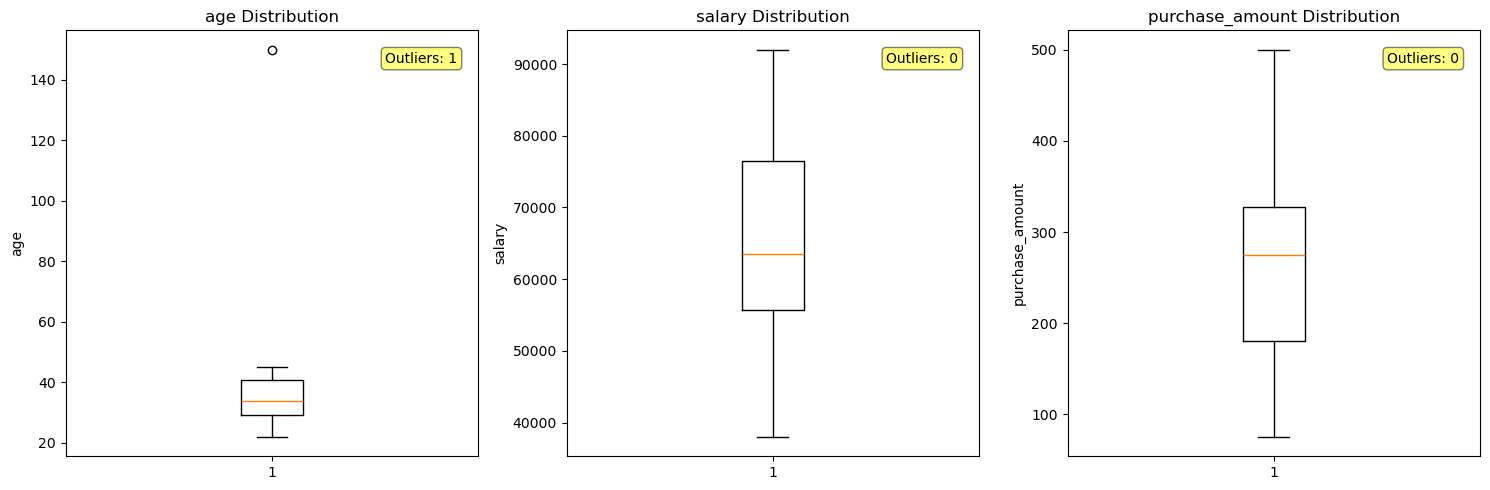


🔄 3. Apply Different Strategies Per Column:
   Strategy A: Remove impossible age values (age > 100):
     Found 1 records with age > 100
     Removed. Remaining records: 17

   Strategy B: Cap salary outliers (winsorize at 1st and 99th percentiles):
     Capped salary between: [$38,800.00, $90,400.00]
     Original range: [$38,000.00, $92,000.00]
     Capped range: [$38,800.00, $90,400.00]

   Strategy C: Transform purchase_amount with log (right-skewed):
     Original purchase_amount - Skewness: 0.17
     Log-transformed - Skewness: -0.75
     (Closer to 0 means more symmetric distribution)

🚩 4. Create Outlier Flags for Analysis:
     salary_outlier: 0 outliers identified
     purchase_amount_outlier: 0 outliers identified

✅ Outlier handling complete! We now have:
   - Cleaned age (removed impossible values)
   - Capped salary (winsorized)
   - Log-transformed purchase amount
   - Outlier flags for analysis


In [42]:

## Cell 12: Outliers - Practical Application

print("=== HANDLING OUTLIERS ===")

# 1. Identify outliers in numerical columns
print("🔍 1. Identify Outliers in Numerical Columns:")
numerical_cols = ['age', 'salary', 'purchase_amount']

for col in numerical_cols:
    print(f"\n   Analyzing '{col}':")
    
    # Calculate statistics
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    print(f"     Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"     Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"     Outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"     Example outliers: {outliers[col].iloc[:3].tolist()}")
print()

# 2. Visualize outliers
print("📊 2. Visualize Outliers with Box Plots:")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df_clean[col].dropna())
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_ylabel(col)
    
    # Calculate and show outlier count
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    
    axes[idx].text(0.95, 0.95, f'Outliers: {outliers_count}', 
                  transform=axes[idx].transAxes, ha='right', va='top',
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()
print()

# 3. Handle outliers differently per column
print("🔄 3. Apply Different Strategies Per Column:")

# Strategy A: Remove impossible age values (age > 100)
print("   Strategy A: Remove impossible age values (age > 100):")
invalid_age = df_clean[df_clean['age'] > 100]
print(f"     Found {len(invalid_age)} records with age > 100")
df_clean = df_clean[df_clean['age'] <= 100]
print(f"     Removed. Remaining records: {len(df_clean)}")
print()

# Strategy B: Cap salary outliers (winsorize at 1st and 99th percentiles)
print("   Strategy B: Cap salary outliers (winsorize at 1st and 99th percentiles):")
lower_cap = df_clean['salary'].quantile(0.01)
upper_cap = df_clean['salary'].quantile(0.99)

df_clean['salary_capped'] = df_clean['salary'].clip(lower=lower_cap, upper=upper_cap)

print(f"     Capped salary between: [${lower_cap:,.2f}, ${upper_cap:,.2f}]")
print(f"     Original range: [${df_clean['salary'].min():,.2f}, ${df_clean['salary'].max():,.2f}]")
print(f"     Capped range: [${df_clean['salary_capped'].min():,.2f}, ${df_clean['salary_capped'].max():,.2f}]")
print()

# Strategy C: Transform purchase_amount with log (right-skewed)
print("   Strategy C: Transform purchase_amount with log (right-skewed):")
# Add small constant to avoid log(0)
df_clean['purchase_log'] = np.log1p(df_clean['purchase_amount'])

print(f"     Original purchase_amount - Skewness: {df_clean['purchase_amount'].skew():.2f}")
print(f"     Log-transformed - Skewness: {df_clean['purchase_log'].skew():.2f}")
print("     (Closer to 0 means more symmetric distribution)")
print()

# 4. Create outlier flags for analysis
print("🚩 4. Create Outlier Flags for Analysis:")

for col in ['salary', 'purchase_amount']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    flag_col = f'{col}_outlier'
    df_clean[flag_col] = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    
    print(f"     {flag_col}: {df_clean[flag_col].sum()} outliers identified")

print("\n✅ Outlier handling complete! We now have:")
print("   - Cleaned age (removed impossible values)")
print("   - Capped salary (winsorized)")
print("   - Log-transformed purchase amount")
print("   - Outlier flags for analysis")

 ### Impact on Different Analyses:
    Mean: Highly affected by outliers
    
    Median: Robust to outliers
    
    Standard deviation: Highly affected
    
    Correlation: Can be misleading
    
    Regression: Skewed results

 ### Common Mistakes:
    Removing outliers without investigation
    
    Not checking for multivariate outliers
    
    Assuming symmetric distribution for IQR
    
    Forgetting to document outlier handling

# ✅ Part 6: Data Validation and Quality Checks

## Why Validate After Cleaning?
**Cleaning without validation = Guessing!**  
Need to ensure:
1. **No new errors** introduced during cleaning
2. **Business rules** are still satisfied
3. **Data consistency** maintained
4. **Ready for analysis**

## Validation Checklist:

### 1. Completeness Checks
```python
# Check for remaining missing values
df.isna().sum()

# Check critical fields
critical_fields = ['customer_id', 'email', 'name']
df[critical_fields].isna().sum()

# Validate with business rules
expected_completeness = 0.95  # 95% complete
actual_completeness = 1 - (df.isna().sum().sum() / df.size)
assert actual_completeness >= expected_completeness, "Data not complete enough"



### 2. Consistency Checks

```python
# Data type consistency
df.dtypes

# Value range consistency
(df['age'] >= 0).all()  # Age shouldn't be negative
(df['salary'] > 0).all()  # Salary should be positive

# Date consistency
(df['order_date'] <= df['delivery_date']).all()  # Order before delivery

# Categorical value consistency
valid_statuses = ['active', 'inactive', 'pending']
df['status'].isin(valid_statuses).all()

### 3. Uniqueness Checks

```python
# Primary key uniqueness
df['customer_id'].is_unique

# Business logic uniqueness
df.duplicated(subset=['email', 'phone']).sum() == 0

# Check for near-duplicates
df['name'].str.lower().str.strip().duplicated().sum()

### 4. Accuracy Checks

```python
# Cross-field validation
(df['age'] >= 18).all()  # All customers should be adults
(df['purchase_amount'] <= df['credit_limit']).all()  # Purchase within limit

# Pattern validation
email_pattern = r'^[^@]+@[^@]+\.[^@]+$'
df['email'].str.match(email_pattern).all()

# Length validation
(df['zip_code'].str.len() == 5).all()  # US ZIP codes are 5 digits

### 5. Business Rule Validation

```python
# Custom business rules
def validate_business_rules(df):
    errors = []
    
    # Rule 1: Active customers must have email
    active_no_email = df[(df['status'] == 'active') & (df['email'].isna())]
    if len(active_no_email) > 0:
        errors.append(f"Active customers without email: {len(active_no_email)}")
    
    # Rule 2: Salary should be within reasonable range
    invalid_salary = df[(df['salary'] < 20000) | (df['salary'] > 500000)]
    if len(invalid_salary) > 0:
        errors.append(f"Unreasonable salaries: {len(invalid_salary)}")
    
    # Rule 3: Join date shouldn't be in future
    future_join = df[df['join_date'] > pd.Timestamp.now()]
    if len(future_join) > 0:
        errors.append(f"Future join dates: {len(future_join)}")
    
    return errors

### Quality Metrics to Track:

```python
# Calculate data quality metrics
quality_metrics = {
    'completeness': 1 - (df.isna().sum().sum() / df.size),
    'uniqueness': df['id'].nunique() / len(df),
    'validity': (df['age'].between(0, 120).sum() / len(df)),
    'consistency': (df['end_date'] > df['start_date']).mean(),
    'accuracy': 0.95  # From manual sampling
}

### Automated Validation Frameworks:
1. Great Expectations: Define and test data expectations

2. Pandas Schema: Define schema with constraints

3. Deequ (AWS): Unit testing for data

4. Soda SQL: SQL-based data testing

Create Validation Reports:


In [49]:
def generate_validation_report(df):
    report = {
        'summary': {
            'total_rows': len(df),
            'total_columns': len(df.columns),
            'total_cells': df.size
        },
        'completeness': {},
        'validity': {},
        'uniqueness': {},
        'issues': []
    }
    
    # Add checks here...
    
    return report

### Best Practices:
1. Validate early, validate often

2. Keep original data alongside cleaned

3. Document all validation rules

4. Automate validation where possible

5. Create data quality dashboards

6. Set up alerts for quality degradation

In [52]:


## Cell 14: Validation - Practical Application

print("=== DATA VALIDATION AND QUALITY CHECKS ===")

# 1. Create validation functions
print("🔍 1. Define Validation Rules:")

def validate_completeness(df):
    """Check for missing values in critical fields"""
    critical_fields = ['customer_id', 'name_clean', 'email_clean']
    results = {}
    
    for field in critical_fields:
        missing = df[field].isna().sum()
        pct_missing = (missing / len(df)) * 100
        results[field] = {
            'missing': missing,
            'pct_missing': pct_missing,
            'status': 'PASS' if pct_missing == 0 else 'FAIL'
        }
    
    return results

def validate_uniqueness(df):
    """Check uniqueness of key fields"""
    results = {}
    
    # customer_id should be unique
    duplicates = df['customer_id'].duplicated().sum()
    results['customer_id'] = {
        'duplicates': duplicates,
        'status': 'PASS' if duplicates == 0 else 'FAIL'
    }
    
    # email should be unique (excluding placeholder)
    valid_emails = df[~df['email_clean'].str.contains('placeholder', na=False)]
    email_dups = valid_emails['email_clean'].duplicated().sum()
    results['email'] = {
        'duplicates': email_dups,
        'status': 'PASS' if email_dups == 0 else 'FAIL'
    }
    
    return results

def validate_business_rules(df):
    """Validate against business logic"""
    issues = []
    
    # Rule 1: Age should be between 18 and 100
    invalid_age = df[(df['age'] < 18) | (df['age'] > 100)]
    if len(invalid_age) > 0:
        issues.append(f"Invalid age range: {len(invalid_age)} records")
    
    # Rule 2: Salary should be positive
    invalid_salary = df[df['salary'] <= 0]
    if len(invalid_salary) > 0:
        issues.append(f"Non-positive salary: {len(invalid_salary)} records")
    
    # Rule 3: Join date shouldn't be in future
    if 'join_date' in df.columns:
        future_join = df[df['join_date'] > pd.Timestamp.now()]
        if len(future_join) > 0:
            issues.append(f"Future join dates: {len(future_join)} records")
    
    # Rule 4: Active status requires valid email
    active_no_email = df[
        (df['status_standardized'] == 'active') & 
        (df['email_clean'].str.contains('placeholder', na=False))
    ]
    if len(active_no_email) > 0:
        issues.append(f"Active customers with placeholder email: {len(active_no_email)}")
    
    return issues

def validate_data_types(df):
    """Verify correct data types"""
    expected_types = {
        'customer_id': 'object',
        'age': 'float64',  # Allow NaN
        'salary': 'float64',
        'purchase_amount': 'float64',
        'join_date': 'datetime64[ns]'
    }
    
    issues = []
    for col, expected_type in expected_types.items():
        if col in df.columns:
            actual_type = str(df[col].dtype)
            if actual_type != expected_type:
                issues.append(f"{col}: Expected {expected_type}, got {actual_type}")
    
    return issues

# 2. Run validation
print("🚀 2. Run Validation Checks:")

validation_results = {
    'completeness': validate_completeness(df_clean),
    'uniqueness': validate_uniqueness(df_clean),
    'business_rules': validate_business_rules(df_clean),
    'data_types': validate_data_types(df_clean)
}

# 3. Display validation report
print("📋 3. Validation Report:")

print("\nA. Completeness Check:")
for field, result in validation_results['completeness'].items():
    status_icon = "✅" if result['status'] == 'PASS' else "❌"
    print(f"   {status_icon} {field}: {result['missing']} missing ({result['pct_missing']:.1f}%)")

print("\nB. Uniqueness Check:")
for field, result in validation_results['uniqueness'].items():
    status_icon = "✅" if result['status'] == 'PASS' else "❌"
    print(f"   {status_icon} {field}: {result['duplicates']} duplicates")

print("\nC. Business Rule Violations:")
if validation_results['business_rules']:
    for issue in validation_results['business_rules']:
        print(f"   ⚠️  {issue}")
else:
    print("   ✅ No business rule violations")

print("\nD. Data Type Issues:")
if validation_results['data_types']:
    for issue in validation_results['data_types']:
        print(f"   ⚠️  {issue}")
else:
    print("   ✅ All data types correct")

# 4. Calculate overall data quality score
print("\n📊 4. Data Quality Score Calculation:")

def calculate_quality_score(results):
    total_checks = 0
    passed_checks = 0
    
    # Completeness checks
    for field, result in results['completeness'].items():
        total_checks += 1
        if result['status'] == 'PASS':
            passed_checks += 1
    
    # Uniqueness checks
    for field, result in results['uniqueness'].items():
        total_checks += 1
        if result['status'] == 'PASS':
            passed_checks += 1
    
    # Business rules
    total_checks += 1
    if len(results['business_rules']) == 0:
        passed_checks += 1
    
    # Data types
    total_checks += 1
    if len(results['data_types']) == 0:
        passed_checks += 1
    
    return (passed_checks / total_checks) * 100

quality_score = calculate_quality_score(validation_results)
print(f"   Data Quality Score: {quality_score:.1f}%")

if quality_score >= 90:
    print("   🎉 Excellent data quality!")
elif quality_score >= 75:
    print("   👍 Good data quality")
elif quality_score >= 60:
    print("   ⚠️  Acceptable data quality (needs improvement)")
else:
    print("   ❌ Poor data quality (requires significant cleaning)")

=== DATA VALIDATION AND QUALITY CHECKS ===
🔍 1. Define Validation Rules:
🚀 2. Run Validation Checks:
📋 3. Validation Report:

A. Completeness Check:
   ✅ customer_id: 0 missing (0.0%)
   ✅ name_clean: 0 missing (0.0%)
   ✅ email_clean: 0 missing (0.0%)

B. Uniqueness Check:
   ✅ customer_id: 0 duplicates
   ✅ email: 0 duplicates

C. Business Rule Violations:
   ⚠️  Active customers with placeholder email: 1

D. Data Type Issues:
   ⚠️  age: Expected float64, got int64
   ⚠️  salary: Expected float64, got int64

📊 4. Data Quality Score Calculation:
   Data Quality Score: 71.4%
   ⚠️  Acceptable data quality (needs improvement)


# 🚀 Part 7: Complete Data Cleaning Pipeline

## End-to-End Cleaning Workflow:

### Phase 1: Assessment (Understand the Data)

1. Load data and examine structure

2. Identify data types and issues

3. Check for missing values

4. Look for duplicates

5. Examine distributions and outliers


### Phase 2: Cleaning Plan (Strategy)

1. Document all identified issues

2. Decide cleaning methods for each issue

3. Create backup of original data

4. Plan validation checks


### Phase 3: Execution (Apply Cleaning)

1. Handle missing values

2. Remove/merge duplicates

3. Convert data types

4. Clean and standardize strings

5. Handle outliers

6. Feature engineering (if needed)


### Phase 4: Validation (Quality Check)

1. Run validation rules

2. Check data integrity

3. Verify business logic

4. Calculate quality metrics


### Phase 5: Documentation (Record Changes)

1. Document all transformations

2. Save cleaned dataset

3. Generate cleaning report

4. Archive original data


## Automated Pipeline Template:

```python
class DataCleaningPipeline:
    def __init__(self, df):
        self.df = df.copy()
        self.df_original = df.copy()
        self.cleaning_log = []
        
    def log_step(self, step_name, changes):
        """Record cleaning step"""
        self.cleaning_log.append({
            'step': step_name,
            'timestamp': pd.Timestamp.now(),
            'changes': changes,
            'rows_before': len(self.df),
            'rows_after': len(self.df)
        })
    
    def handle_missing_values(self):
        # Your missing value handling logic
        pass
    
    def remove_duplicates(self):
        # Your duplicate removal logic
        pass
    
    def clean_data_types(self):
        # Your data type conversion logic
        pass
    
    def standardize_text(self):
        # Your text cleaning logic
        pass
    
    def handle_outliers(self):
        # Your outlier handling logic
        pass
    
    def validate(self):
        # Your validation logic
        pass
    
    def run_pipeline(self):
        """Execute complete cleaning pipeline"""
        steps = [
            self.handle_missing_values,
            self.remove_duplicates,
            self.clean_data_types,
            self.standardize_text,
            self.handle_outliers,
            self.validate
        ]
        
        for step in steps:
            step_name = step.__name__
            print(f"Executing: {step_name}")
            step()
            print(f"Completed: {step_name}")
        
        return self.df, self.cleaning_log

✅ DOs:

    Always backup original data
    
    Document every cleaning step
    
    Validate after each major change
    
    Keep raw and cleaned data separate
    
    Use consistent naming conventions
    
    Test on sample before full dataset
    
    Automate repetitive cleaning tasks
    
    Monitor data quality over time

❌ DON'Ts:

    Don't modify original data in place
    
    Don't ignore business context
    
    Don't remove outliers without analysis
    
    Don't hardcode values (use parameters)
    
    Don't skip validation
    
    Don't forget to handle edge cases
    
    Don't clean in production without testing
    
    Don't assume data is clean after one pass

### 📁 Project Structure Template:

### 📈 When to Stop Cleaning?

Ask yourself:
1. Does the data meet analysis requirements? ✓
2. Are major issues resolved? ✓
3. Is quality score acceptable? ✓
4. Is further cleaning cost-effective? ✓
5. Can you explain all transformations? ✓

If YES to all → Data is clean enough!


---

 ### Complete Cleaning Pipeline - Practical Implementation
```python
print("=== COMPLETE CLEANING PIPELINE ===")

# Define a complete cleaning pipeline class
class CustomerDataCleaningPipeline:
    """End-to-end pipeline for cleaning customer data"""
    
    def __init__(self, df):
        self.df = df.copy()
        self.df_original = df.copy()
        self.cleaning_log = []
        self.stats_before = {}
        self.stats_after = {}
        
    def log_step(self, step_name, description, changes):
        """Record cleaning step with details"""
        log_entry = {
            'step': step_name,
            'timestamp': pd.Timestamp.now(),
            'description': description,
            'changes': changes,
            'rows_before': len(self.df),
            'rows_after': len(self.df),
            'columns_before': len(self.df.columns),
            'columns_after': len(self.df.columns)
        }
        self.cleaning_log.append(log_entry)
        print(f"  ✓ {step_name}: {description}")
        
    def capture_stats(self, stage_name):
        """Capture dataset statistics at different stages"""
        stats = {
            'total_rows': len(self.df),
            'total_columns': len(self.df.columns),
            'missing_values': self.df.isna().sum().sum(),
            'duplicate_rows': self.df.duplicated().sum(),
            'memory_mb': self.df.memory_usage(deep=True).sum() / 1024 / 1024
        }
        
        if stage_name == 'before':
            self.stats_before = stats
        else:
            self.stats_after = stats
            
    def handle_missing_values(self):
        """Step 1: Handle missing values"""
        step_name = "Missing Value Handling"
        
        # Capture before state
        missing_before = self.df.isna().sum().sum()
        
        # Strategy 1: Remove rows with missing customer_id
        self.df = self.df.dropna(subset=['customer_id'])
        
        # Strategy 2: Fill email with placeholder
        self.df['email'] = self.df['email'].fillna('no-email@placeholder.com')
        
        # Strategy 3: Fill numeric columns with median
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if self.df[col].isna().sum() > 0:
                self.df[col] = self.df[col].fillna(self.df[col].median())
        
        missing_after = self.df.isna().sum().sum()
        
        self.log_step(
            step_name,
            f"Removed {missing_before - missing_after} missing values",
            {
                'removed_rows_with_missing_id': missing_before - missing_after,
                'filled_emails': (self.df['email'] == 'no-email@placeholder.com').sum(),
                'remaining_missing': missing_after
            }
        )
        
    def remove_duplicates(self):
        """Step 2: Remove duplicate records"""
        step_name = "Duplicate Removal"
        
        duplicates_before = self.df.duplicated(subset=['customer_id']).sum()
        
        # Keep most recent record based on join_date
        self.df = self.df.sort_values('join_date', ascending=False)
        self.df = self.df.drop_duplicates(subset=['customer_id'], keep='first')
        
        duplicates_after = self.df.duplicated(subset=['customer_id']).sum()
        
        self.log_step(
            step_name,
            f"Removed {duplicates_before - duplicates_after} duplicate customer records",
            {
                'duplicates_removed': duplicates_before - duplicates_after,
                'remaining_duplicates': duplicates_after
            }
        )
        
    def clean_data_types(self):
        """Step 3: Convert data types"""
        step_name = "Data Type Conversion"
        
        changes = {}
        
        # Convert age to numeric
        if 'age' in self.df.columns:
            invalid_age_before = (self.df['age'].apply(lambda x: not isinstance(x, (int, float))) if 'age' in self.df.columns else 0)
            self.df['age'] = pd.to_numeric(self.df['age'], errors='coerce')
            changes['age_converted'] = f"Converted age to numeric"
        
        # Convert purchase_amount to float
        if 'purchase_amount' in self.df.columns:
            self.df['purchase_amount'] = pd.to_numeric(self.df['purchase_amount'], errors='coerce')
            changes['purchase_converted'] = "Converted purchase_amount to float"
        
        # Convert join_date to datetime
        if 'join_date' in self.df.columns:
            self.df['join_date'] = pd.to_datetime(self.df['join_date'], errors='coerce')
            changes['date_converted'] = "Converted join_date to datetime"
        
        # Convert status to categorical
        if 'status' in self.df.columns:
            self.df['status'] = self.df['status'].astype('category')
            changes['status_categorical'] = "Converted status to categorical"
        
        self.log_step(step_name, "Converted various columns to appropriate data types", changes)
        
    def standardize_text(self):
        """Step 4: Clean and standardize text fields"""
        step_name = "Text Standardization"
        
        changes = {}
        
        # Clean names
        if 'name' in self.df.columns:
            self.df['name_clean'] = (
                self.df['name']
                .str.strip()
                .str.title()
                .str.replace(r'\s+', ' ', regex=True)
            )
            changes['names_cleaned'] = "Standardized name formatting"
        
        # Standardize emails
        if 'email' in self.df.columns:
            self.df['email_clean'] = self.df['email'].str.lower().str.strip()
            changes['emails_standardized'] = "Lowercased and trimmed emails"
        
        # Standardize phone numbers
        if 'phone' in self.df.columns:
            def format_phone(phone):
                if pd.isna(phone):
                    return None
                digits = re.sub(r'\D', '', str(phone))
                if len(digits) == 10:
                    return f"{digits[:3]}-{digits[3:6]}-{digits[6:]}"
                return None
            
            self.df['phone_clean'] = self.df['phone'].apply(format_phone)
            valid_phones = self.df['phone_clean'].notna().sum()
            changes['phones_formatted'] = f"Formatted {valid_phones} phone numbers"
        
        self.log_step(step_name, "Standardized text fields", changes)
        
    def handle_outliers(self):
        """Step 5: Handle outliers"""
        step_name = "Outlier Handling"
        
        changes = {}
        
        # Remove impossible age values
        if 'age' in self.df.columns:
            invalid_age = self.df[self.df['age'] > 100]
            if len(invalid_age) > 0:
                self.df = self.df[self.df['age'] <= 100]
                changes['age_outliers'] = f"Removed {len(invalid_age)} age outliers (>100)"
        
        # Cap salary at 99th percentile
        if 'salary' in self.df.columns:
            salary_cap = self.df['salary'].quantile(0.99)
            salary_outliers = self.df[self.df['salary'] > salary_cap]
            if len(salary_outliers) > 0:
                self.df['salary_capped'] = self.df['salary'].clip(upper=salary_cap)
                changes['salary_capped'] = f"Capped {len(salary_outliers)} salary outliers at ${salary_cap:,.2f}"
        
        self.log_step(step_name, "Handled outliers in numerical columns", changes)
        
    def validate_and_finalize(self):
        """Step 6: Final validation and cleanup"""
        step_name = "Validation and Finalization"
        
        changes = {}
        
        # Reset index
        self.df = self.df.reset_index(drop=True)
        changes['index_reset'] = "Reset DataFrame index"
        
        # Select final columns (remove intermediate columns)
        final_columns = [
            'customer_id', 'name_clean', 'email_clean', 'phone_clean',
            'age', 'salary_capped' if 'salary_capped' in self.df.columns else 'salary',
            'purchase_amount', 'join_date', 'status'
        ]
        
        # Keep only columns that exist
        final_columns = [col for col in final_columns if col in self.df.columns]
        self.df = self.df[final_columns]
        
        changes['final_columns'] = f"Selected {len(final_columns)} final columns"
        
        self.log_step(step_name, "Finalized cleaned dataset", changes)
        
    def run_pipeline(self):
        """Execute the complete cleaning pipeline"""
        print("🚀 STARTING DATA CLEANING PIPELINE")
        print("=" * 50)
        
        # Capture initial stats
        self.capture_stats('before')
        
        # Execute all steps
        steps = [
            self.handle_missing_values,
            self.remove_duplicates,
            self.clean_data_types,
            self.standardize_text,
            self.handle_outliers,
            self.validate_and_finalize
        ]
        
        for step in steps:
            try:
                step()
            except Exception as e:
                print(f"  ✗ Error in {step.__name__}: {e}")
                raise
        
        # Capture final stats
        self.capture_stats('after')
        
        print("\n" + "=" * 50)
        print("✅ PIPELINE COMPLETED SUCCESSFULLY")
        
        return self.df, self.cleaning_log
    
    def generate_report(self):
        """Generate a cleaning report"""
        report = {
            'summary': {
                'original_rows': len(self.df_original),
                'cleaned_rows': len(self.df),
                'rows_removed': len(self.df_original) - len(self.df),
                'original_columns': len(self.df_original.columns),
                'cleaned_columns': len(self.df.columns),
                'cleaning_steps': len(self.cleaning_log)
            },
            'statistics': {
                'before': self.stats_before,
                'after': self.stats_after
            },
            'cleaning_log': self.cleaning_log
        }
        
        return report

# Run the pipeline
print("Initializing pipeline with messy data...")
pipeline = CustomerDataCleaningPipeline(df)

print("\nRunning cleaning pipeline...")
cleaned_df, cleaning_log = pipeline.run_pipeline()

print("\n📊 CLEANING REPORT:")
report = pipeline.generate_report()

print(f"\nSummary:")
print(f"  Original dataset: {report['summary']['original_rows']} rows, {report['summary']['original_columns']} columns")
print(f"  Cleaned dataset: {report['summary']['cleaned_rows']} rows, {report['summary']['cleaned_columns']} columns")
print(f"  Rows removed: {report['summary']['rows_removed']}")
print(f"  Cleaning steps: {report['summary']['cleaning_steps']}")

print(f"\nMemory usage:")
print(f"  Before: {report['statistics']['before']['memory_mb']:.2f} MB")
print(f"  After: {report['statistics']['after']['memory_mb']:.2f} MB")
print(f"  Reduction: {(1 - report['statistics']['after']['memory_mb']/report['statistics']['before']['memory_mb'])*100:.1f}%")

print(f"\nMissing values:")
print(f"  Before: {report['statistics']['before']['missing_values']}")
print(f"  After: {report['statistics']['after']['missing_values']}")

print("\n🧹 Cleaning Steps Performed:")
for i, log in enumerate(cleaning_log, 1):
    print(f"\n{i}. {log['step']}")
    print(f"   {log['description']}")
    for change, value in log['changes'].items():
        print(f"   - {change}: {value}")

print("\n🔍 First 5 rows of cleaned data:")
print(cleaned_df.head())